# DBSCAN - Density Based Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)


## Standardizing Data

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## DBSCAN


In [4]:
dbscan = DBSCAN(eps=1.8, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [5]:
X['Cluster'] = clusters



## Dimensionality Reduction

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['PCA1'], X['PCA2'] = X_pca[:, 0], X_pca[:, 1]


## Visualization

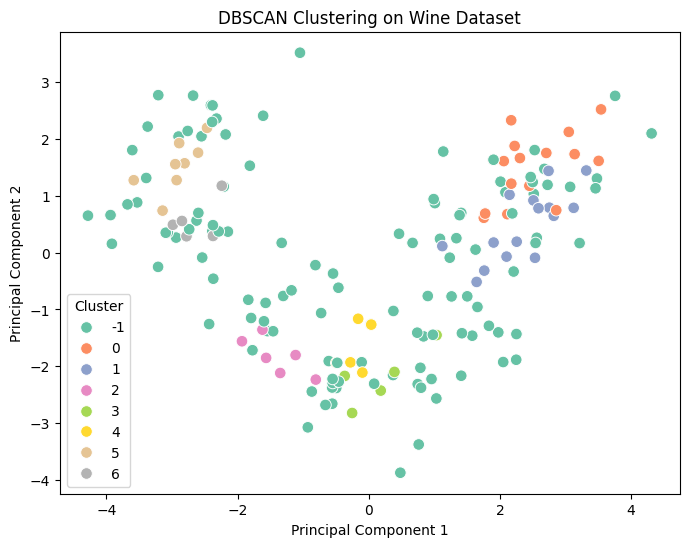

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('DBSCAN Clustering on Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [8]:
print("Cluster Distribution:\n", X['Cluster'].value_counts())
print(f"Noise Points Detected: {(X['Cluster'] == -1).sum()}")

Cluster Distribution:
 Cluster
-1    118
 0     16
 1     15
 5      8
 2      6
 3      5
 4      5
 6      5
Name: count, dtype: int64
Noise Points Detected: 118
